In [ ]:
  !unzip twitter.zip

Archive:  twitter.zip
  inflating: twitter_training.csv    
  inflating: twitter_validation.csv  


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
train_file = pd.read_csv('/content/twitter_training.csv')
df_train = pd.DataFrame(train_file)
df_train.head()

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


In [ ]:
df_train.columns = ['Tweet ID', 'Entity', 'Sentiment', 'Content']

In [ ]:
df_train.head()

,Tweet ID,Entity,Sentiment,Content
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


In [ ]:
df_train.shape

(74681, 4)

In [ ]:
test_file = pd.read_csv('/content/twitter_validation.csv')
df_test = pd.DataFrame(test_file)
df_test.head()

,3364,Facebook,Irrelevant,"I mentioned on Facebook that I was struggling for motivation to go for a run the other day, which has been translated by Tom’s great auntie as ‘Hayley can’t get out of bed’ and told to his grandma, who now thinks I’m a lazy, terrible person 🤣"
0,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
1,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
2,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
3,4433,Google,Neutral,Now the President is slapping Americans in the...
4,6273,FIFA,Negative,Hi @EAHelp I’ve had Madeleine McCann in my cel...


In [ ]:
df_test.columns = ['Tweet ID', 'Entity', 'Sentiment', 'Content']


In [ ]:
df_test.shape

(999, 4)

In [ ]:
print(df_train.isnull().sum())
print(df_test.isnull().sum())

Tweet ID       0
Entity         0
Sentiment      0
Content      686
dtype: int64
Tweet ID     0
Entity       0
Sentiment    0
Content      0
dtype: int64


In [ ]:
df_train = df_train.dropna()

In [ ]:
df_train.isnull().sum()

Tweet ID     0
Entity       0
Sentiment    0
Content      0
dtype: int64

In [ ]:
df_train.shape

(73995, 4)

In [ ]:
x_train, y_train = df_train['Content'], df_train['Sentiment']
x_test, y_test = df_test['Content'], df_test['Sentiment']

In [ ]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(73995,)
(73995,)
(999,)
(999,)


In [ ]:
x_train.head()

0    I am coming to the borders and I will kill you...
1    im getting on borderlands and i will kill you ...
2    im coming on borderlands and i will murder you...
3    im getting on borderlands 2 and i will murder ...
4    im getting into borderlands and i can murder y...
Name: Content, dtype: object

In [ ]:
y_train.head()

0    Positive
1    Positive
2    Positive
3    Positive
4    Positive
Name: Sentiment, dtype: object

In [ ]:
print(y_train.unique())
print(y_test.unique())

['Positive' 'Neutral' 'Negative' 'Irrelevant']
['Neutral' 'Negative' 'Positive' 'Irrelevant']


In [ ]:
y_train, y_test = y_train.replace('Irrelevant', 'Neutral'), y_test.replace('Irrelevant', 'Neutral')

In [ ]:
print(y_train.unique())
print(y_test.unique())

['Positive' 'Neutral' 'Negative']
['Neutral' 'Negative' 'Positive']


Tokenization

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical

In [ ]:
vocab_size = 80000
oov_tok = '<OOV>'
max_length = 50
padded = 'post'
trunc = 'post'

In [ ]:
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(x_train)
word_index = tokenizer.word_index
print(word_index)

{'<OOV>': 1, 'the': 2, 'i': 3, 'to': 4, 'and': 5, 'a': 6, 'of': 7, 'is': 8, 'in': 9, 'for': 10, 'this': 11, 'it': 12, 'you': 13, 'on': 14, 'my': 15, 'that': 16, 'com': 17, 'with': 18, 'game': 19, 'so': 20, 'be': 21, 'me': 22, 'have': 23, 'just': 24, 'but': 25, 'not': 26, 'are': 27, 'all': 28, 'at': 29, 'was': 30, 'like': 31, 'out': 32, 'from': 33, '2': 34, 'your': 35, 'pic': 36, 'twitter': 37, 'now': 38, 'get': 39, 'we': 40, 'as': 41, 'they': 42, 'has': 43, 'if': 44, 'one': 45, 'do': 46, 'good': 47, 't': 48, 'about': 49, 'can': 50, 'play': 51, 'no': 52, 'will': 53, 'an': 54, 'new': 55, 'really': 56, 'love': 57, 'when': 58, 'up': 59, "i'm": 60, 'unk': 61, 'what': 62, 'more': 63, 'time': 64, 'by': 65, 'johnson': 66, 'how': 67, 'people': 68, 'some': 69, 'or': 70, 'why': 71, '3': 72, 'see': 73, 'shit': 74, "it's": 75, 'co': 76, 'been': 77, 'best': 78, 'still': 79, 'facebook': 80, '’': 81, 'https': 82, 'got': 83, 'games': 84, 'go': 85, '1': 86, 'great': 87, 'amazon': 88, 'even': 89, 'playin

In [ ]:
train_seq = tokenizer.texts_to_sequences(x_train)
test_seq = tokenizer.texts_to_sequences(x_test)
train_padded = pad_sequences(train_seq,
                             maxlen=max_length,
                             padding=padded,
                            truncating =trunc)
test_padded = pad_sequences(test_seq,
                            maxlen=max_length,
                            padding=padded,
                            truncating=trunc)
print(train_padded)

[[   3  121  405 ...    0    0    0]
 [ 308  175   14 ...    0    0    0]
 [ 308  405   14 ...    0    0    0]
 ...
 [  24 1976    2 ...    0    0    0]
 [  24 1976  750 ...    0    0    0]
 [  24   31    2 ...    0    0    0]]


In [ ]:
print(train_padded.shape)
print(test_padded.shape)

(73995, 50)
(999, 50)


In [ ]:
y_train, y_test = pd.get_dummies(y_train), pd.get_dummies(y_test)

In [ ]:
print(y_train.shape)
print(y_test.shape)

(73995, 3)
(999, 3)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Dense, GlobalAveragePooling1D, LSTM
# Embedding layer enables us to convert each word into a fixed length vector of defined size.
#When we pass this input layer into the global average pooling operation then it will calculate the average value of every single map and returns the average value to the output node
from tensorflow.keras.optimizers import Adam

In [ ]:
model = Sequential()
model.add(Embedding(input_dim=vocab_size,
                    output_dim=1,
                    input_length=max_length,
                    name='input'))
# model.add(LSTM(units=64, activation='relu', name='lstm'))
model.add(Global55555+6AveragePooling1D())
# model.add(Dense(units=64, activation='relu'))
model.add(Dense(units=8, activation='relu'))
model.add(Dense(units=4, activation='relu'))
model.add(Dense(units=3, activation='softmax', name='output'))
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (Embedding)           (None, 50, 1)             80000     
                                                                 
 global_average_pooling1d (G  (None, 1)                0         
 lobalAveragePooling1D)                                          
                                                                 
 dense (Dense)               (None, 8)                 16        
                                                                 
 dense_1 (Dense)             (None, 4)                 36        
                                                                 
 output (Dense)              (None, 3)                 15        
                                                                 
Total params: 80,067
Trainable params: 80,067
Non-trainable params: 0
____________________________________________________

In [ ]:
history = model.fit(train_padded,
                    y_train,
                    batch_size=1000,
                    epochs=100,
                    verbose=1,
                    validation_data=(test_padded, y_test))

Epoch 1/100
74/74 [==============================] - 2s 12ms/step - loss: 1.0873 - accuracy: 0.4187 - val_loss: 1.0696 - val_accuracy: 0.4565
Epoch 2/100
74/74 [==============================] - 1s 12ms/step - loss: 1.0772 - accuracy: 0.4187 - val_loss: 1.0595 - val_accuracy: 0.4565
Epoch 3/100
74/74 [==============================] - 1s 12ms/step - loss: 1.0659 - accuracy: 0.4219 - val_loss: 1.0397 - val_accuracy: 0.4725
Epoch 4/100
74/74 [==============================] - 1s 11ms/step - loss: 1.0390 - accuracy: 0.4607 - val_loss: 0.9944 - val_accuracy: 0.5305
Epoch 5/100
74/74 [==============================] - 1s 8ms/step - loss: 0.9878 - accuracy: 0.5200 - val_loss: 0.9246 - val_accuracy: 0.5816
Epoch 6/100
74/74 [==============================] - 1s 8ms/step - loss: 0.9227 - accuracy: 0.5609 - val_loss: 0.8554 - val_accuracy: 0.5936
Epoch 7/100
74/74 [==============================] - 1s 8ms/step - loss: 0.8653 - accuracy: 0.5858 - val_loss: 0.8009 - val_accuracy: 0.6096
Epoch 8/1

In [ ]:
def plot_compare(x, y1, y2, label1, label2, title, xlabel, ylabel):
    plt.figure(figsize=(12,6))
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.plot(x, y1, color='blue', label=label1)
    plt.plot(x, y2, color='red', label=label2)
    plt.legend()
    plt.show()

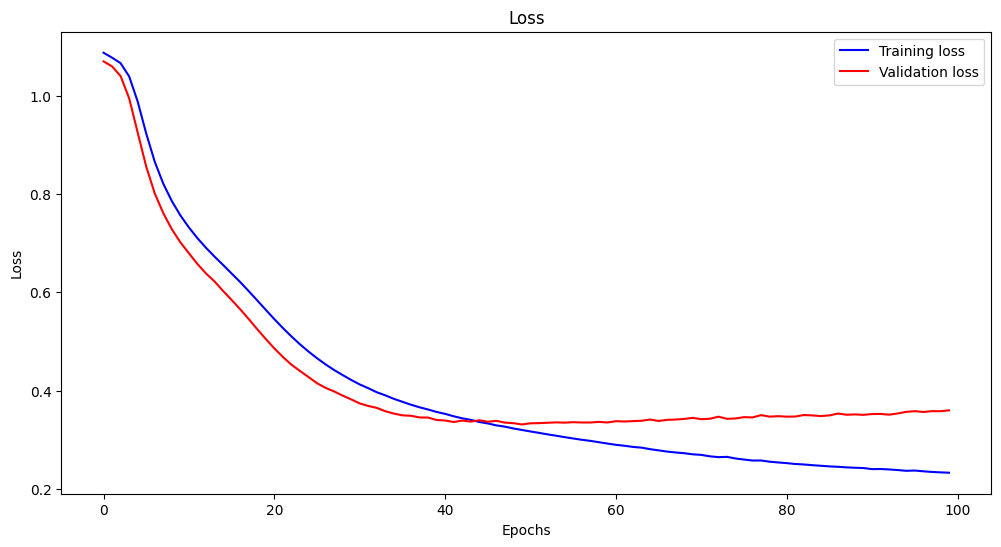

In [ ]:
hist = history.history
hist = pd.DataFrame(hist)
plot_compare(range(len(hist)),
             hist['loss'],
             hist['val_loss'],
             label1='Training loss',
             label2='Validation loss',
             title='Loss',
             xlabel='Epochs',
             ylabel='Loss')

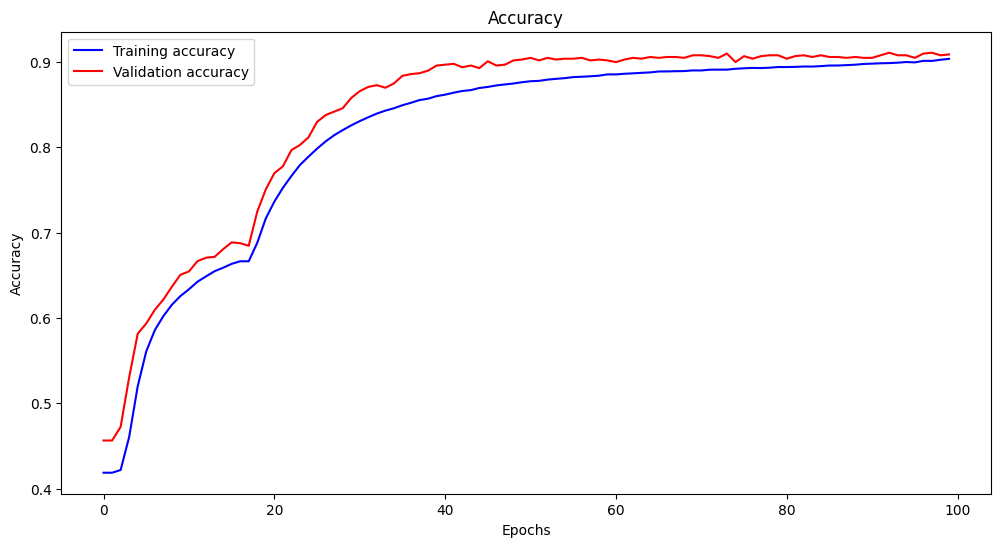

In [ ]:
plot_compare(range(len(hist)),
             hist['accuracy'],
             hist['val_accuracy'],
             label1='Training accuracy',
             label2='Validation accuracy',
             title='Accuracy',
             xlabel='Epochs',
             ylabel='Accuracy')

Prediction

In [ ]:
sentence = ['I do not like you']

In [ ]:
pred_sequence = tokenizer.texts_to_sequences(sentence)
pred_padded = pad_sequences(pred_sequence,
                            maxlen=max_length,
                            padding=padded,
                            truncating=trunc)

In [ ]:
print(pred_padded)
print(pred_padded.shape)

[[ 3 46 26 31 13  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0]]
(1, 50)


In [ ]:
label = y_train.columns
print(label)

Index(['Negative', 'Neutral', 'Positive'], dtype='object')


In [ ]:
pred = model.predict(pred_padded)
print(pred)
print(sentence[0] + ' = {}'.format(label[np.argmax(pred)]))

1/1 [==============================] - 0s 31ms/step
[[0.53061795 0.3011412  0.16824086]]
I do not like you = Negative
